In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# ann(artifical neural network)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor, XGBRFRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("europe-motorbikes.csv")
df = data
print(data)
print(data.isna().sum())

       price  mileage  power                make_model     date      fuel  \
0      23990      150  218.0                     Honda  03/2020  Gasoline   
1       7500     2871   90.0              BMW F 800 GT  09/2018  Gasoline   
2        800     1700    3.0    Nova Motors Retro Star  10/2019  Gasoline   
3      14990    24345    NaN              Aprilia RSV4  03/2016  Gasoline   
4       6200    25000  128.0      Kawasaki Ninja ZX-6R  08/2009  Gasoline   
...      ...      ...    ...                       ...      ...       ...   
34912  17300    10592  125.0             BMW R 1200 RT  04/2018  Gasoline   
34913   8500    29000   54.0  Harley-Davidson Iron 883  05/2004  Gasoline   
34914  11990    39140  160.0             BMW S 1000 XR  06/2015       NaN   
34915   8350    11500   56.0   Triumph Bonneville T100  05/2018  Gasoline   
34916   8500    19000   46.0           Yamaha TMAX 530  07/2018  Gasoline   

            gear     offer_type                   version  \
0         Manu

In [3]:
print(data.shape)

(34917, 10)


In [4]:
data = data.drop('version', axis=1)
data = data.drop('link', axis=1)

In [5]:
print(data)
print(data.dtypes)
describe = data.describe()
print(describe)

       price  mileage  power                make_model     date      fuel  \
0      23990      150  218.0                     Honda  03/2020  Gasoline   
1       7500     2871   90.0              BMW F 800 GT  09/2018  Gasoline   
2        800     1700    3.0    Nova Motors Retro Star  10/2019  Gasoline   
3      14990    24345    NaN              Aprilia RSV4  03/2016  Gasoline   
4       6200    25000  128.0      Kawasaki Ninja ZX-6R  08/2009  Gasoline   
...      ...      ...    ...                       ...      ...       ...   
34912  17300    10592  125.0             BMW R 1200 RT  04/2018  Gasoline   
34913   8500    29000   54.0  Harley-Davidson Iron 883  05/2004  Gasoline   
34914  11990    39140  160.0             BMW S 1000 XR  06/2015       NaN   
34915   8350    11500   56.0   Triumph Bonneville T100  05/2018  Gasoline   
34916   8500    19000   46.0           Yamaha TMAX 530  07/2018  Gasoline   

            gear     offer_type  
0         Manual  Demonstration  
1      

In [6]:
data = data.dropna()

In [7]:
print(data)
print(data.isna().sum())
print(data)

       price  mileage  power                   make_model     date      fuel  \
0      23990      150  218.0                        Honda  03/2020  Gasoline   
1       7500     2871   90.0                 BMW F 800 GT  09/2018  Gasoline   
10     23600     2900   84.0  Harley-Davidson Sport Glide  06/2019  Gasoline   
12     18000      700   41.0                  Ural Ranger  03/2021  Gasoline   
14     10000    80000  125.0    Harley-Davidson Night Rod  09/2010  Gasoline   
...      ...      ...    ...                          ...      ...       ...   
34902  18990        1   54.0              Big Dog Bulldog  10/2004  Gasoline   
34911  36500     7000   90.0   Harley-Davidson Road Glide  09/2019  Gasoline   
34912  17300    10592  125.0                BMW R 1200 RT  04/2018  Gasoline   
34915   8350    11500   56.0      Triumph Bonneville T100  05/2018  Gasoline   
34916   8500    19000   46.0              Yamaha TMAX 530  07/2018  Gasoline   

            gear     offer_type  
0    

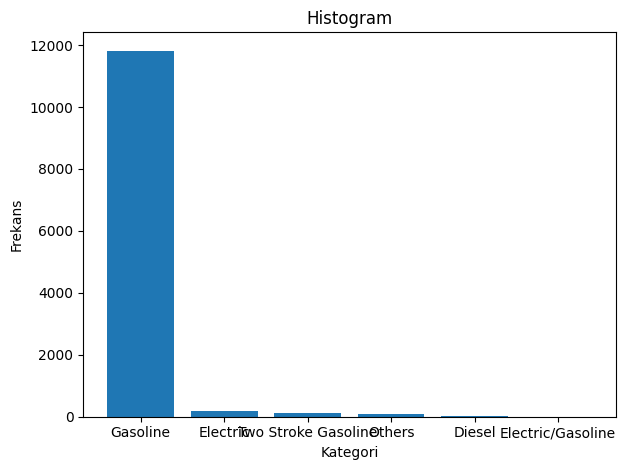

In [8]:
value_fuel = data['fuel'].value_counts()
plt.bar(value_fuel.index, value_fuel.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

In [9]:
data = data[data['fuel'] != 'Others']
data = data[data['fuel'] != 'Diesel']
data = data[data['fuel'] != 'LPG']
data = data[data['fuel'] != 'Electric/Gasoline']

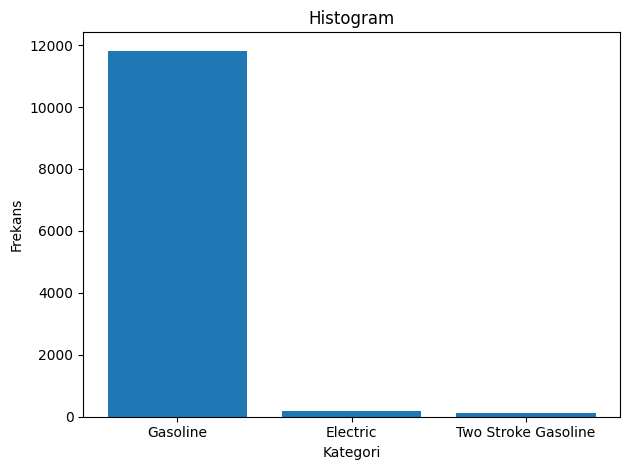

In [10]:
value_fuel = data['fuel'].value_counts()
plt.bar(value_fuel.index, value_fuel.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

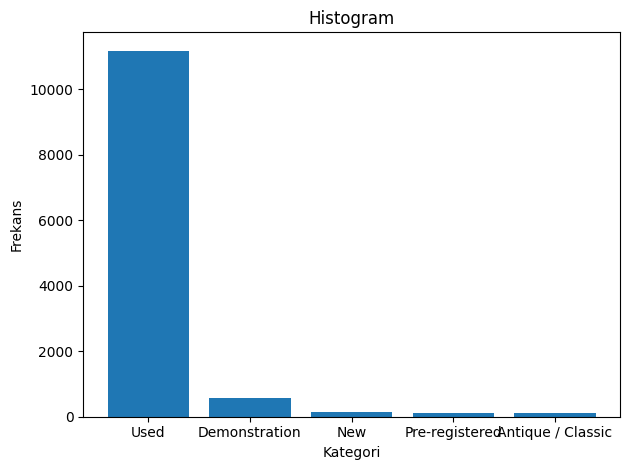

In [11]:
value_offer = data['offer_type'].value_counts()
plt.bar(value_offer.index, value_offer.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

In [12]:
data = data[data['offer_type'] != 'Demonstration']
data = data[data['offer_type'] != 'Pre-registered']

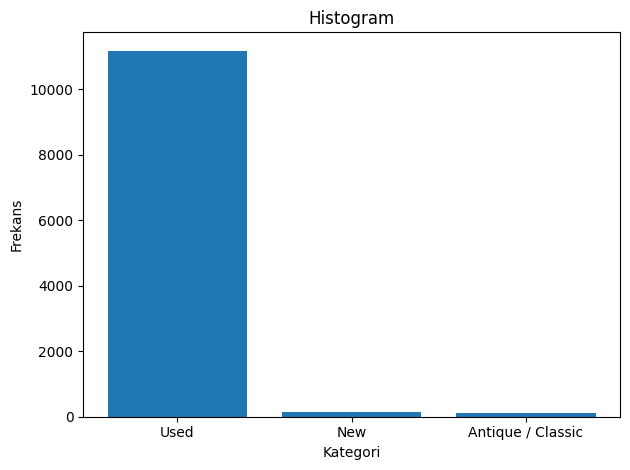

In [13]:
value_offer = data['offer_type'].value_counts()
plt.bar(value_offer.index, value_offer.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

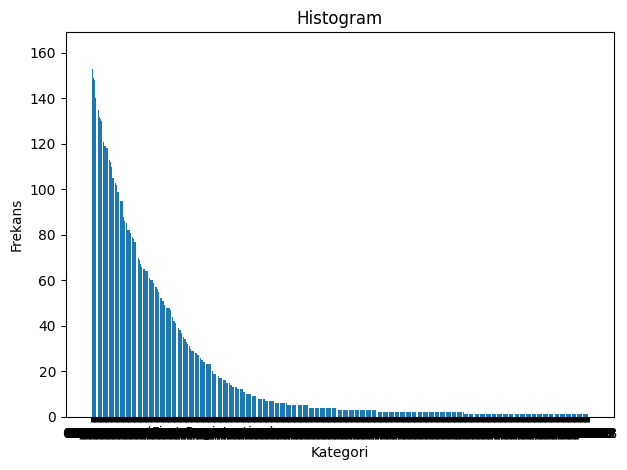

In [14]:
value_date = data['date'].value_counts()
plt.bar(value_date.index, value_date.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

In [15]:
data = data[data['date'] != '- (First Registration)']
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.year
data['date'].astype('int64')

1        2018
10       2019
12       2021
14       2010
17       1996
         ... 
34902    2004
34911    2019
34912    2018
34915    2018
34916    2018
Name: date, Length: 11417, dtype: int64

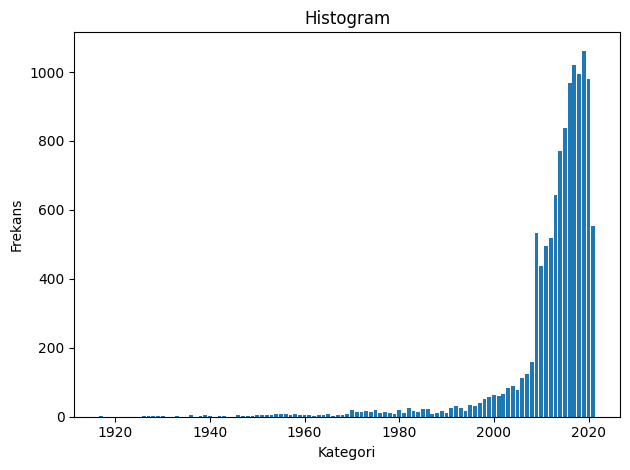

In [16]:
value_date = data['date'].value_counts()
plt.bar(value_date.index, value_date.values)
plt.title('Histogram')
plt.xlabel('Kategori')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

In [17]:
describe = data.describe()
print(describe)

              price       mileage         power          date
count  1.141700e+04  1.141700e+04  11417.000000  11417.000000
mean   1.113906e+05  2.164372e+04    107.065604   2012.602172
std    8.477659e+06  1.638069e+05    622.922462     10.536830
min    2.000000e+00  0.000000e+00      1.000000   1917.000000
25%    7.200000e+03  4.500000e+03     58.000000   2011.000000
50%    1.000000e+04  1.290000e+04     95.000000   2015.000000
75%    1.300000e+04  2.650000e+04    125.000000   2018.000000
max    8.888889e+08  9.999999e+06  34596.000000   2021.000000


In [18]:
data[['brand', 'model']] = data['make_model'].str.split(' ', n=1, expand=True)
make_model = data['make_model']
data = data.drop('make_model', axis=1)

In [19]:
print(data.isna().sum())
data = data.dropna()
print(data.isna().sum())

price           0
mileage         0
power           0
date            0
fuel            0
gear            0
offer_type      0
brand           0
model         933
dtype: int64
price         0
mileage       0
power         0
date          0
fuel          0
gear          0
offer_type    0
brand         0
model         0
dtype: int64


One Hot Encoding

In [20]:
le = LabelEncoder()
data.dtypes

price           int64
mileage         int64
power         float64
date            int32
fuel           object
gear           object
offer_type     object
brand          object
model          object
dtype: object

In [21]:
fuel = data['fuel']
fuel_encoded = pd.get_dummies(fuel, prefix='fuel').astype(int)
data = pd.concat([data, fuel_encoded], axis=1)
data = data.drop('fuel', axis=1)
print(data)

       price  mileage  power  date       gear offer_type            brand  \
1       7500     2871   90.0  2018     Manual       Used              BMW   
10     23600     2900   84.0  2019     Manual       Used  Harley-Davidson   
12     18000      700   41.0  2021     Manual       Used             Ural   
14     10000    80000  125.0  2010     Manual       Used  Harley-Davidson   
17     12500    18000   82.0  1996     Manual       Used  Harley-Davidson   
...      ...      ...    ...   ...        ...        ...              ...   
34902  18990        1   54.0  2004     Manual       Used              Big   
34911  36500     7000   90.0  2019     Manual       Used  Harley-Davidson   
34912  17300    10592  125.0  2018     Manual       Used              BMW   
34915   8350    11500   56.0  2018     Manual       Used          Triumph   
34916   8500    19000   46.0  2018  Automatic       Used           Yamaha   

                 model  fuel_Electric  fuel_Gasoline  fuel_Two Stroke Gasol

In [22]:
gear = data['gear']
gear_encoded = pd.get_dummies(gear, prefix='gear').astype(int)
data = pd.concat([data, gear_encoded], axis=1)
data = data.drop('gear', axis=1)
print(data)

       price  mileage  power  date offer_type            brand  \
1       7500     2871   90.0  2018       Used              BMW   
10     23600     2900   84.0  2019       Used  Harley-Davidson   
12     18000      700   41.0  2021       Used             Ural   
14     10000    80000  125.0  2010       Used  Harley-Davidson   
17     12500    18000   82.0  1996       Used  Harley-Davidson   
...      ...      ...    ...   ...        ...              ...   
34902  18990        1   54.0  2004       Used              Big   
34911  36500     7000   90.0  2019       Used  Harley-Davidson   
34912  17300    10592  125.0  2018       Used              BMW   
34915   8350    11500   56.0  2018       Used          Triumph   
34916   8500    19000   46.0  2018       Used           Yamaha   

                 model  fuel_Electric  fuel_Gasoline  \
1             F 800 GT              0              1   
10         Sport Glide              0              1   
12              Ranger              0  

In [23]:
offer_type = data['offer_type']
offer_type_encoded = pd.get_dummies(offer_type, prefix='offer_type').astype(int)
data = pd.concat([data, offer_type_encoded], axis=1)
data = data.drop('offer_type', axis=1)
print(data)

       price  mileage  power  date            brand            model  \
1       7500     2871   90.0  2018              BMW         F 800 GT   
10     23600     2900   84.0  2019  Harley-Davidson      Sport Glide   
12     18000      700   41.0  2021             Ural           Ranger   
14     10000    80000  125.0  2010  Harley-Davidson        Night Rod   
17     12500    18000   82.0  1996  Harley-Davidson        Road King   
...      ...      ...    ...   ...              ...              ...   
34902  18990        1   54.0  2004              Big      Dog Bulldog   
34911  36500     7000   90.0  2019  Harley-Davidson       Road Glide   
34912  17300    10592  125.0  2018              BMW        R 1200 RT   
34915   8350    11500   56.0  2018          Triumph  Bonneville T100   
34916   8500    19000   46.0  2018           Yamaha         TMAX 530   

       fuel_Electric  fuel_Gasoline  fuel_Two Stroke Gasoline  gear_Automatic  \
1                  0              1                   

In [24]:
data['brand'] = le.fit_transform(data['brand'])
data['model'] = le.fit_transform(data['model'])
print(data)

       price  mileage  power  date  brand  model  fuel_Electric  \
1       7500     2871   90.0  2018     10    369              0   
10     23600     2900   84.0  2019     47    964              0   
12     18000      700   41.0  2021    125    867              0   
14     10000    80000  125.0  2010     47    717              0   
17     12500    18000   82.0  1996     47    876              0   
...      ...      ...    ...   ...    ...    ...            ...   
34902  18990        1   54.0  2004     17    311              0   
34911  36500     7000   90.0  2019     47    875              0   
34912  17300    10592  125.0  2018     10    799              0   
34915   8350    11500   56.0  2018    122    182              0   
34916   8500    19000   46.0  2018    131   1023              0   

       fuel_Gasoline  fuel_Two Stroke Gasoline  gear_Automatic  gear_Manual  \
1                  1                         0               0            1   
10                 1                 

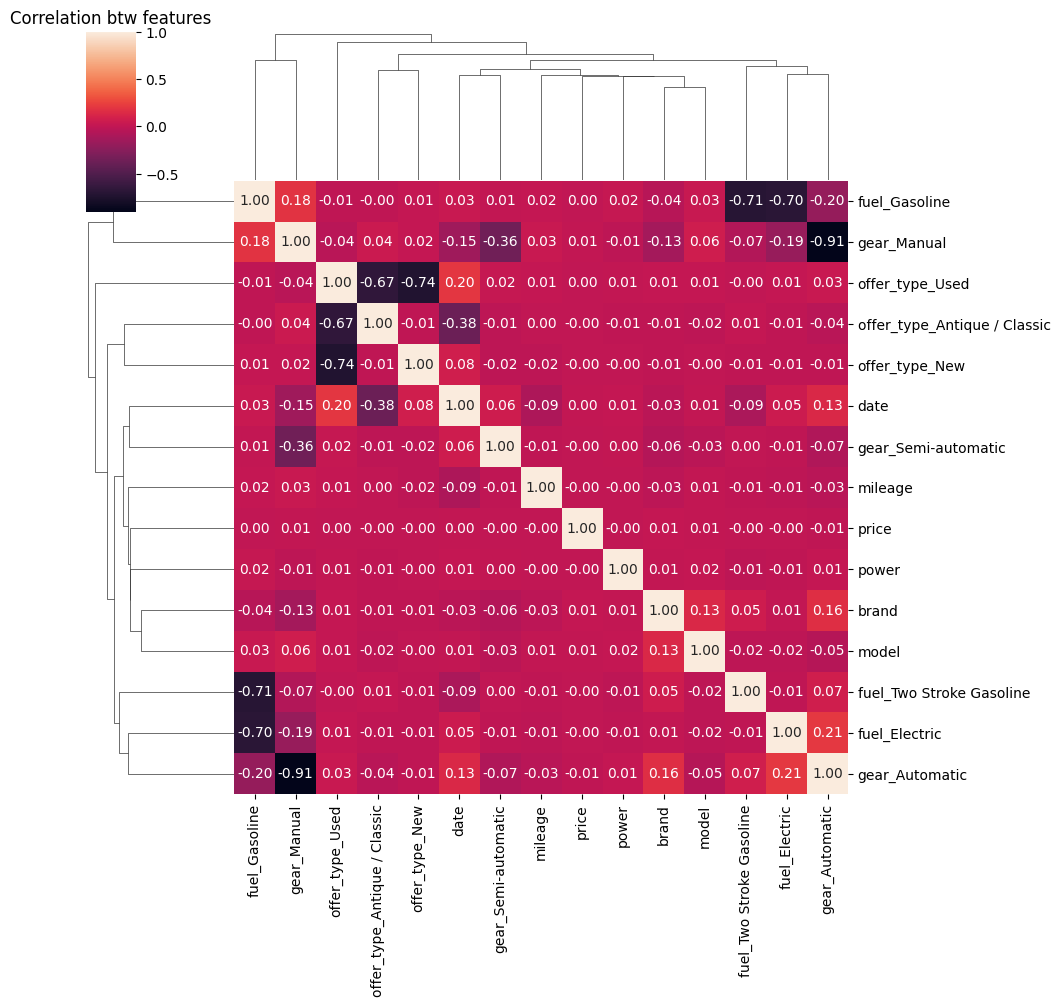

In [25]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

In [26]:
describe = data.describe()
print(describe)

              price       mileage         power          date         brand  \
count  1.048400e+04  1.048400e+04  10484.000000  10484.000000  10484.000000   
mean   1.201669e+05  2.027280e+04    109.847863   2012.867989     55.337085   
std    8.846826e+06  1.004882e+05    649.703206      9.710870     40.229771   
min    2.000000e+00  0.000000e+00      1.000000   1917.000000      0.000000   
25%    7.200000e+03  4.900000e+03     60.000000   2011.000000     10.000000   
50%    1.000000e+04  1.326000e+04     95.000000   2015.000000     47.000000   
75%    1.299000e+04  2.700000e+04    125.000000   2018.000000     74.000000   
max    8.888889e+08  9.999999e+06  34596.000000   2021.000000    136.000000   

              model  fuel_Electric  fuel_Gasoline  fuel_Two Stroke Gasoline  \
count  10484.000000   10484.000000   10484.000000              10484.000000   
mean     675.097959       0.009061       0.981496                  0.009443   
std      350.733940       0.094764       0.134773  

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10484 entries, 1 to 34916
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         10484 non-null  int64  
 1   mileage                       10484 non-null  int64  
 2   power                         10484 non-null  float64
 3   date                          10484 non-null  int32  
 4   brand                         10484 non-null  int32  
 5   model                         10484 non-null  int32  
 6   fuel_Electric                 10484 non-null  int32  
 7   fuel_Gasoline                 10484 non-null  int32  
 8   fuel_Two Stroke Gasoline      10484 non-null  int32  
 9   gear_Automatic                10484 non-null  int32  
 10  gear_Manual                   10484 non-null  int32  
 11  gear_Semi-automatic           10484 non-null  int32  
 12  offer_type_Antique / Classic  10484 non-null  int32  
 13  offer_

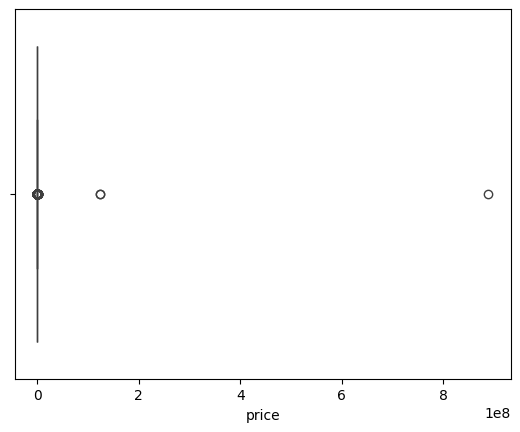

In [28]:
plt.figure()
sns.boxplot(x = data['price'])
plt.show()

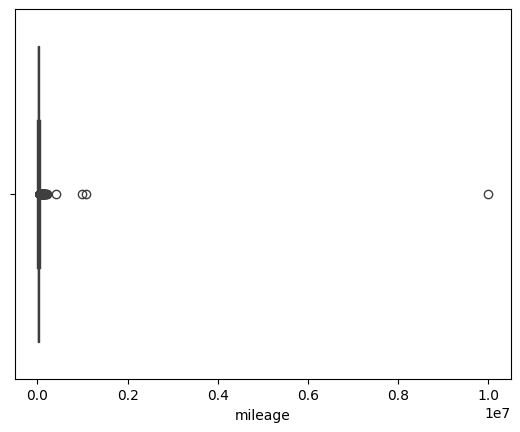

In [29]:
plt.figure()
sns.boxplot(x = data['mileage'])
plt.show()

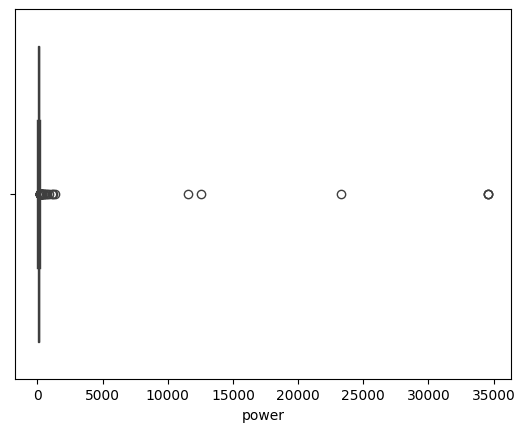

In [30]:
plt.figure()
sns.boxplot(x = data['power'])
plt.show()

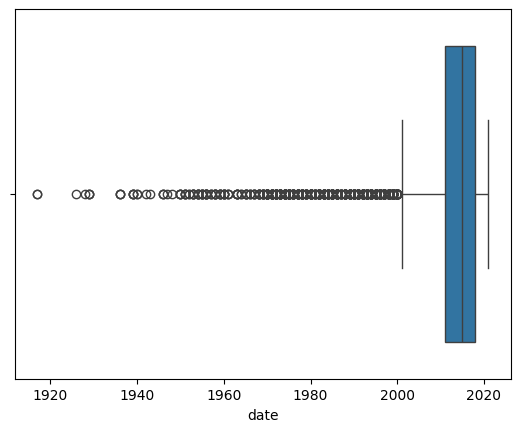

In [31]:
plt.figure()
sns.boxplot(x = data['date'])
plt.show()

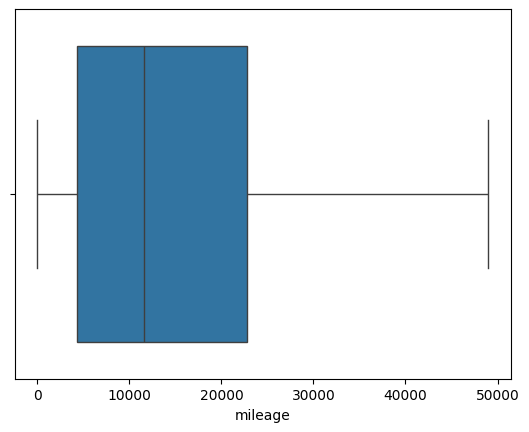

In [32]:
thr = 1
mileage_desc = describe['mileage']
q3_mil = mileage_desc[6]
q1_mil = mileage_desc[4]
IQR_mil = q3_mil - q1_mil
top_limit_mil = q3_mil + thr*IQR_mil
bottom_limit_mil = q1_mil - thr*IQR_mil
filter_mil_bottom = bottom_limit_mil < data['mileage']
filter_mil_top = data['mileage'] < top_limit_mil
filter_mil = filter_mil_bottom & filter_mil_top

data = data[filter_mil]

plt.figure()
sns.boxplot(x = data['mileage'])
plt.show()

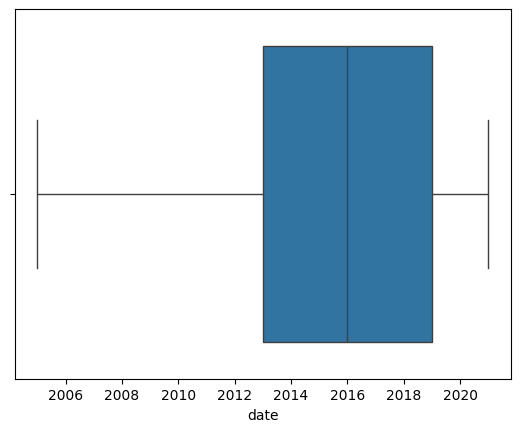

In [33]:
date_desc = describe['date']
q3_date = date_desc[6]
q1_date = date_desc[4]
IQR_date = q3_date - q1_date
top_limit_date = q3_date + thr*IQR_date
bottom_limit_date = q1_date - thr*IQR_date
filter_date_bottom = bottom_limit_date < data['date']
filter_date_top = data['date'] < top_limit_date
filter_date = filter_date_bottom & filter_date_top

data = data[filter_date]

plt.figure()
sns.boxplot(x = data['date'])
plt.show()

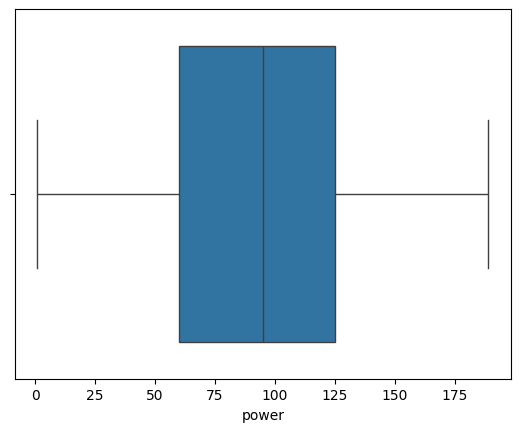

In [34]:
power_desc = describe['power']
q3_pow = power_desc[6]
q1_pow = power_desc[4]
IQR_pow = q3_pow - q1_pow
top_limit_pow = q3_pow + thr*IQR_pow
bottom_limit_pow = q1_pow - thr*IQR_pow
filter_pow_bottom = bottom_limit_pow < data['power']
filter_pow_top = data['power'] < top_limit_pow
filter_pow = filter_pow_bottom & filter_pow_top

data = data[filter_pow]

plt.figure()
sns.boxplot(x = data['power'])
plt.show()

In [35]:
skewness_price = skew(data['price'])
skewness_mileage = skew(data['mileage'])
skewness_power = skew(data['power'])
skewness_date = skew(data['date'])
print("Price skew : ", skewness_price, " Mileage Skew : ", skewness_mileage, 
      " Power Skew : ", skewness_power, " Date Skew : ", skewness_date)

Price skew :  87.86053404802979  Mileage Skew :  0.8678201961296638  Power Skew :  -0.19293691966588294  Date Skew :  -0.6083313636052494


In [36]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [37]:
#dosya_adi = 'veri_seti.csv'
#data.to_csv(dosya_adi, index=False) 
#print(f"{dosya_adi} dosyası oluşturuldu.")

In [38]:
print(data.info())
data['power'] = data['power'].astype(int)
print(data)

<class 'pandas.core.frame.DataFrame'>
Index: 8559 entries, 1 to 34916
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         8559 non-null   int64  
 1   mileage                       8559 non-null   int64  
 2   power                         8559 non-null   float64
 3   date                          8559 non-null   int32  
 4   brand                         8559 non-null   int32  
 5   model                         8559 non-null   int32  
 6   fuel_Electric                 8559 non-null   int32  
 7   fuel_Gasoline                 8559 non-null   int32  
 8   fuel_Two Stroke Gasoline      8559 non-null   int32  
 9   gear_Automatic                8559 non-null   int32  
 10  gear_Manual                   8559 non-null   int32  
 11  gear_Semi-automatic           8559 non-null   int32  
 12  offer_type_Antique / Classic  8559 non-null   int32  
 13  offer_t

In [39]:
data['price'] = np.log1p(data['price'])

In [40]:
data['mileage'], lambda_value = boxcox(data['mileage'] + 1)

In [41]:
skewness_price = skew(data['price'])
skewness_mileage = skew(data['mileage'])
skewness_power = skew(data['power'])
skewness_date = skew(data['date'])
print("Price skew : ", skewness_price, " Mileage Skew : ", skewness_mileage, 
      " Power Skew : ", skewness_power, " Date Skew : ", skewness_date)

Price skew :  -0.4015647081284126  Mileage Skew :  -0.22907469229500643  Power Skew :  -0.19293691966588294  Date Skew :  -0.6083313636052494


In [42]:
#train-test split
x = data.drop(['price'], axis = 1)
y = data.price
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

In [43]:
#Standartization
scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
print("Mean Square Error : ", mse)
print("R2 Score : ", r2_lin)

Mean Square Error :  0.28030246027906885
R2 Score :  0.4194976187516102


In [45]:
#XGBoost
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Mean Square Error : ", mse)
print("R2 Score : ", r2_xgb)

Mean Square Error :  0.09672416268921397
R2 Score :  0.7996856441807757


In [46]:
#Random Forest Reggressor
model_ranfor = RandomForestRegressor()
model_ranfor.fit(X_train, y_train)

y_pred_ranfor = model_ranfor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ranfor)
r2_ranfor = r2_score(y_test, y_pred_ranfor)
print("Mean Square Error : ", mse)
print("R2 Score : ", r2_ranfor)

Mean Square Error :  0.1076508380185921
R2 Score :  0.7770566560458981


In [47]:
# Lasso regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Square Error : ", mse)
print("R2 Score : ", r2_lasso)

Mean Square Error :  0.48406470404212215
R2 Score :  -0.0024910701639400123


In [48]:
model_dec = DecisionTreeRegressor(max_depth=4)
model_dec.fit(X_train, y_train)

y_pred_dec = model_dec.predict(X_test)
mse_dec = mean_squared_error(y_test, y_pred_dec)
r2_dec = r2_score(y_test, y_pred_dec)
print("Mean Square Error : ", mse_dec)
print("R2 Score : ", r2_dec)

Mean Square Error :  0.1694213875666057
R2 Score :  0.6491307324990858


In [ ]:
model_ann = Sequential()
model_ann.add(Dense(1024, input_dim=14, activation='relu'))
model_ann.add(Dense(1024, activation='relu'))
model_ann.add(Dense(1024, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(4096, activation='relu'))
model_ann.add(Dense(4096, activation='relu'))
model_ann.add(Dense(4096, activation='relu'))
model_ann.add(Dense(4096, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(2048, activation='relu'))
model_ann.add(Dense(1024, activation='relu'))
model_ann.add(Dense(1024, activation='relu'))
model_ann.add(Dense(1024, activation='relu'))
model_ann.add(Dense(1, activation='linear'))
model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_ann.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
150/150 [==============================] - 63s 410ms/step - loss: 37336.4492 - mae: 17.5770 - val_loss: 0.4459 - val_mae: 0.4619
Epoch 2/150
150/150 [==============================] - 65s 434ms/step - loss: 0.3111 - mae: 0.3794 - val_loss: 0.1787 - val_mae: 0.3044
Epoch 3/150
150/150 [==============================] - 65s 433ms/step - loss: 0.2437 - mae: 0.3266 - val_loss: 0.1615 - val_mae: 0.2921
Epoch 4/150
150/150 [==============================] - 64s 428ms/step - loss: 0.2313 - mae: 0.3137 - val_loss: 0.1525 - val_mae: 0.2796
Epoch 5/150
150/150 [==============================] - 65s 431ms/step - loss: 0.2154 - mae: 0.2987 - val_loss: 0.1456 - val_mae: 0.2695
Epoch 6/150
150/150 [==============================] - 66s 441ms/step - loss: 0.2249 - mae: 0.3104 - val_loss: 0.1476 - val_mae: 0.2747
Epoch 7/150
150/150 [==============================] - 66s 437ms/step - loss: 0.2356 - mae: 0.3246 - val_loss: 0.1425 - val_mae: 0.2658
Epoch 8/150
150/150 [======================

In [56]:
y_pred_ann = model_ann.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("Mean Square Error : ", mse_ann)
print("R2 Score : ", r2_ann)

81/81 [==============================] - 1s 6ms/step
Mean Square Error :  0.2731317268949192
R2 Score :  0.4343481049037897
